# **Problem Statement**
You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df = pd.read_csv("/content/train (1).csv")

In [7]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **Data Pre - Processing**

In [8]:
# Looking into the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [10]:
df.shape

(45211, 11)

# **Data Cleaning**

In [11]:
# Checking for Null values
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values in the given dataset.

In [12]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [13]:
#Removing the duplicates
df = df.drop_duplicates()
print(df.shape)

(45205, 11)


# **Outliers**

In [14]:
# Identifying the Outliers using IQR method or box plot method in age column
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)


10.5 70.5


<AxesSubplot:xlabel='age'>

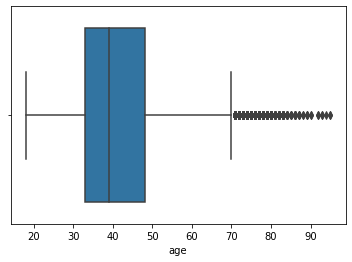

In [15]:

sns.boxplot(x=df['age'])

We have an outliers in the age column, hence removing it 

In [16]:
df['age'] = df['age'].clip(lower_threshold, upper_threshold)

In [17]:
# Identifying the Outliers using IQR method or box plot method in dur column
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['dur'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-221.0 643.0


<AxesSubplot:xlabel='dur'>

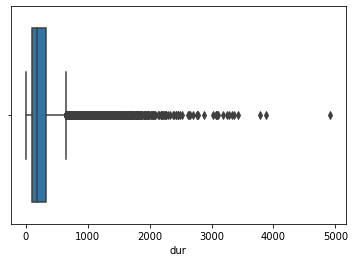

In [18]:

sns.boxplot(x=df['dur'])

We have an outliers in the dur column, hence removing it

In [19]:
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

In [20]:
# Identifying the Outliers using IQR method or box plot method in num_calls column
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-2.0 6.0


<AxesSubplot:xlabel='num_calls'>

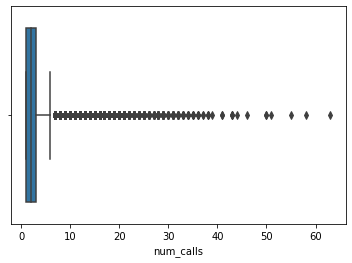

In [21]:
sns.boxplot(x=df['num_calls'])

We have an outliers in the num_calls column, hence removing it

In [22]:
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

# Encoding the target variable

In [23]:
#Label encoding the target variable
df.replace({"y":{'no':0,'yes':1}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,0


In [24]:
# Exploring the Dataset

In [25]:
df['age'].value_counts()


32.0    2084
31.0    1996
33.0    1972
34.0    1929
35.0    1894
36.0    1804
30.0    1757
37.0    1696
39.0    1486
38.0    1466
40.0    1355
41.0    1291
42.0    1242
45.0    1216
29.0    1184
46.0    1175
43.0    1161
44.0    1136
47.0    1088
28.0    1038
48.0     997
49.0     994
50.0     939
51.0     936
52.0     911
27.0     909
53.0     891
57.0     828
54.0     811
55.0     806
26.0     805
56.0     778
59.0     770
58.0     740
60.0     596
25.0     527
70.5     487
24.0     302
23.0     202
61.0     147
22.0     129
62.0      80
21.0      79
63.0      77
64.0      74
70.0      67
66.0      63
65.0      59
67.0      54
20.0      50
69.0      44
68.0      36
19.0      35
18.0      12
Name: age, dtype: int64

In [26]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [27]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [28]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [29]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

We can see there are 13017 unkown variables in the call_type column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

In [30]:
df['call_type'].isnull().sum()

0

In [31]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [32]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [33]:
df['dur'].value_counts()

643.0    3247
124.0     187
90.0      184
89.0      177
114.0     175
         ... 
598.0       7
3.0         4
0.0         3
2.0         3
1.0         2
Name: dur, Length: 644, dtype: int64

In [34]:
df['num_calls'].value_counts()

1.0    17542
2.0    12503
3.0     5521
6.0     4355
4.0     3520
5.0     1764
Name: num_calls, dtype: int64

In [35]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

We can see there are 36953 unkown variables in the prev_outcome column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

In [36]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Imputing unknown values by mode imputation method for the education_qual and job column

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [38]:
df['y'].value_counts()

0    39916
1     5289
Name: y, dtype: int64

In [39]:
df.shape

(45205, 11)

**Exploratory Data Analysis**

Plot for the target variable

[]

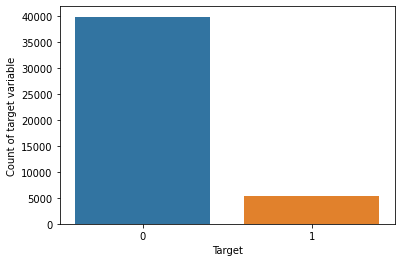

In [40]:
sns.countplot(x=df.y,data=df)
pt.xlabel("Target")
pt.ylabel("Count of target variable")
pt.plot()


The following graph of the target variable shows that it is an unequal distribution.

<AxesSubplot:xlabel='job', ylabel='count'>

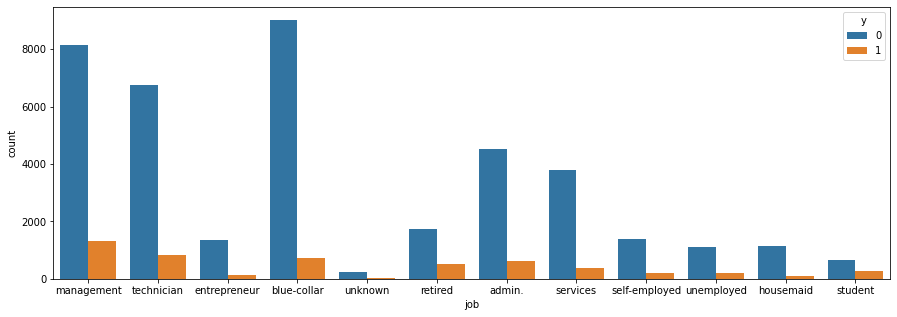

In [41]:
#Job vs Target Variable
pt.figure(figsize=(15, 5))
sns.countplot(x='job',hue='y',data=df)

In [42]:
df["job"].mode()

0    blue-collar
dtype: object

In [43]:
df["job"] = df["job"].replace("unknown", "blue-collar")

<AxesSubplot:ylabel='job'>

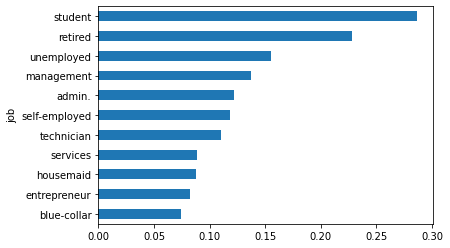

In [44]:
df.groupby('job')['y'].mean().sort_values().plot(kind='barh')

 Above graph show conversion rate of the customer with regarding the their Job. As we can see that the customer who claim the insurance where belongs to student category and low conversion are from blue-collar. But the insurance company contacted the customers who belongs to Blue-collar.

In [45]:
df.replace({"job":{'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11}},inplace=True)
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51.0,5,married,tertiary,cellular,17,nov,643.0,3.0,unknown,1
45207,70.5,10,divorced,primary,cellular,17,nov,456.0,2.0,unknown,1
45208,70.5,10,married,secondary,cellular,17,nov,643.0,5.0,success,1
45209,57.0,1,married,secondary,telephone,17,nov,508.0,4.0,unknown,0
45210,37.0,2,married,secondary,cellular,17,nov,361.0,2.0,other,0


In [46]:
df['job'].isna().sum()

0

<AxesSubplot:xlabel='marital', ylabel='count'>

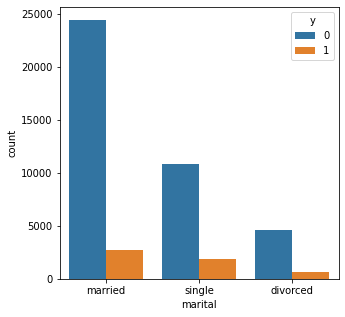

In [47]:
#mritial status vs Target Variable
pt.figure(figsize=(5, 5))
sns.countplot(x='marital',hue='y',data=df)

<AxesSubplot:ylabel='marital'>

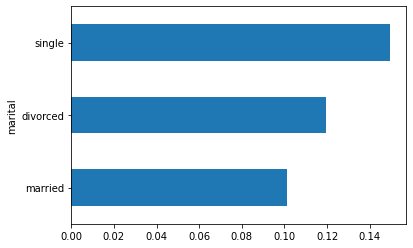

In [48]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='barh')

Above graph show conversion rate of the customer with regarding the their marital status. As we can see that the customer who claim the insurance where belongs to single category and low conversion are married. But the insurance company contacted the customers who belongs to married category.

<AxesSubplot:xlabel='education_qual', ylabel='count'>

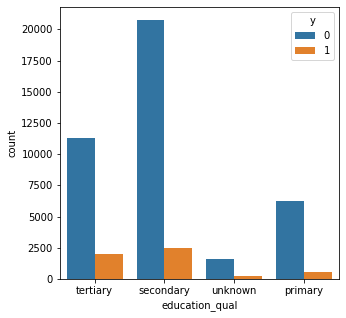

In [49]:
#education_qual vs Target Variable
pt.figure(figsize=(5, 5))
sns.countplot(x='education_qual',hue='y',data=df)

In [50]:
df["education_qual"].mode()

0    secondary
dtype: object

In [51]:
df["education_qual"] = df["education_qual"].replace("unknown", "secondary")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,married,secondary,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,single,secondary,unknown,5,may,198.0,1.0,unknown,0


<AxesSubplot:ylabel='education_qual'>

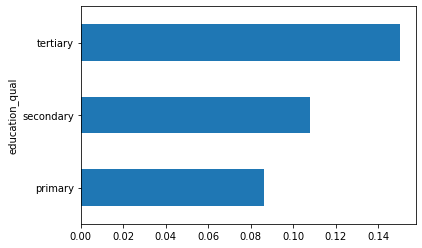

In [52]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='barh')

Above graph show conversion rate of the customer with regarding the their education. As we can see that the customer who claim the insurance mostly are belong Tertiary Education and low conversion are primary education.

In [53]:
#Label Encoding
df.replace({"education_qual":{'primary':1,'secondary':2,'tertiary':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,3,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,single,2,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,married,2,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,married,2,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,single,2,unknown,5,may,198.0,1.0,unknown,0


<AxesSubplot:xlabel='call_type', ylabel='count'>

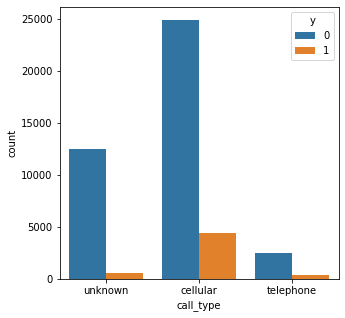

In [54]:
#call type vs Target Variable
pt.figure(figsize=(5, 5))
sns.countplot(x='call_type',hue='y',data=df)

<AxesSubplot:ylabel='call_type'>

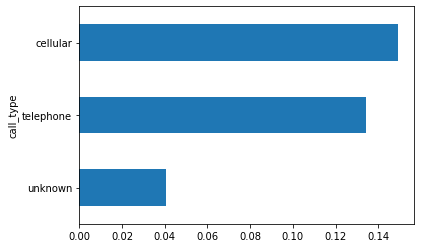

In [55]:
df.groupby('call_type')['y'].mean().sort_values().plot(kind='barh')

Above graph show conversion rate of the customer with regarding call_type. As we can see that the customer who claim the insurance mostly contacted through cellular and low conversion are unknown.

In [56]:
#Label Encoding
df.replace({"call_type":{'unknown':1,'telephone':2,'cellular':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,3,1,5,may,261.0,1.0,unknown,0
1,44.0,5,single,2,1,5,may,151.0,1.0,unknown,0
2,33.0,2,married,2,1,5,may,76.0,1.0,unknown,0
3,47.0,1,married,2,1,5,may,92.0,1.0,unknown,0
4,33.0,1,single,2,1,5,may,198.0,1.0,unknown,0


<AxesSubplot:xlabel='mon', ylabel='count'>

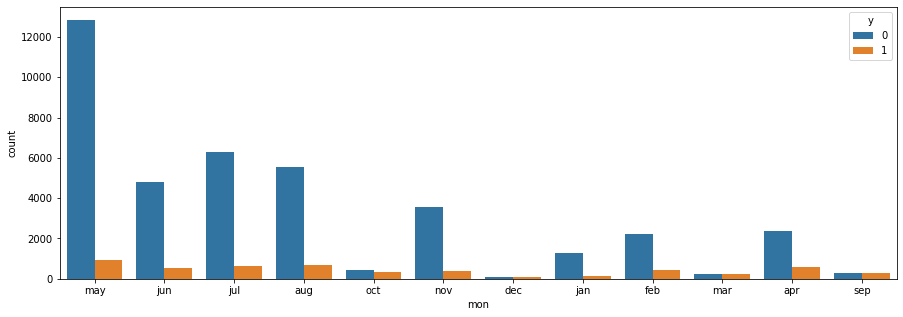

In [57]:
#Month vs Target Variable
pt.figure(figsize=(15, 5))
sns.countplot(x='mon',hue='y',data=df)

<AxesSubplot:ylabel='mon'>

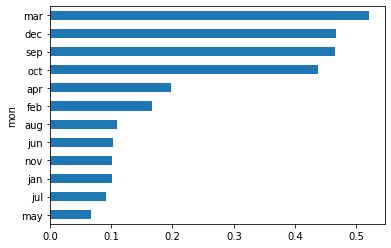

In [58]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='barh')

Above graph show conversion rate of the customer with regarding month. As we can see that the customer who claim the insurance mostly contacted in mar and low conversion are may.

In [59]:
#Label Encoding for the column mon (Month)
df.replace({"mon":{'may':1,'jul':2,'jan':3,'nov':4,'jun':5,'aug':6,'feb':7,'apr':8,'oct':9,'sep':10,'dec':11,'mar':12}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,3,1,5,1,261.0,1.0,unknown,0
1,44.0,5,single,2,1,5,1,151.0,1.0,unknown,0
2,33.0,2,married,2,1,5,1,76.0,1.0,unknown,0
3,47.0,1,married,2,1,5,1,92.0,1.0,unknown,0
4,33.0,1,single,2,1,5,1,198.0,1.0,unknown,0


<AxesSubplot:xlabel='prev_outcome', ylabel='count'>

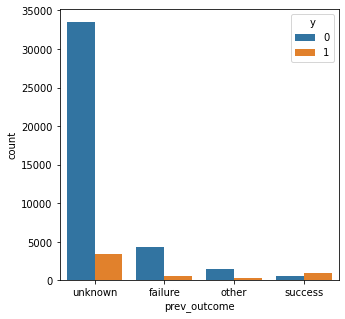

In [60]:
#prev_outcome vs Target Variable
pt.figure(figsize=(5, 5))
sns.countplot(x='prev_outcome',hue='y',data=df)

<AxesSubplot:ylabel='prev_outcome'>

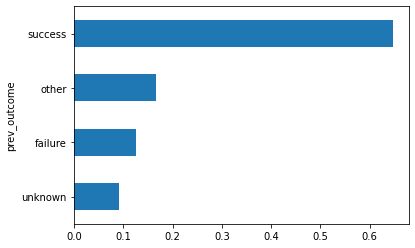

In [61]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='barh')

Above graph show conversion rate of the customer with regarding prev_outcome. As we can see that the customer who claim the insurance mostly took the claim earlier and low conversion were the people whose prev_outcome is unknown.

# Onehot encoding

In [62]:
df=pd.get_dummies(df, columns=['marital','prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,8,3,1,5,1,261.0,1.0,0,0,1,0,0,0,0,1
1,44.0,5,2,1,5,1,151.0,1.0,0,0,0,1,0,0,0,1
2,33.0,2,2,1,5,1,76.0,1.0,0,0,1,0,0,0,0,1
3,47.0,1,2,1,5,1,92.0,1.0,0,0,1,0,0,0,0,1
4,33.0,1,2,1,5,1,198.0,1.0,0,0,0,1,0,0,0,1


# Ploting the Numercial features vs Target Variable

In [63]:
df.columns

Index(['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')

In [64]:
df['age'] = df['age'].astype(int)

In [65]:
df['dur'] = df['dur'].astype(int)

In [66]:
df['num_calls'] = df['num_calls'].astype(int)

In [67]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,1,5,1,261,1,0,0,1,0,0,0,0,1
1,44,5,2,1,5,1,151,1,0,0,0,1,0,0,0,1
2,33,2,2,1,5,1,76,1,0,0,1,0,0,0,0,1
3,47,1,2,1,5,1,92,1,0,0,1,0,0,0,0,1
4,33,1,2,1,5,1,198,1,0,0,0,1,0,0,0,1


In [68]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [69]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,1,5,1,261,1,0,0,1,0,0,0,0,1
1,44,5,2,1,5,1,151,1,0,0,0,1,0,0,0,1
2,33,2,2,1,5,1,76,1,0,0,1,0,0,0,0,1
3,47,1,2,1,5,1,92,1,0,0,1,0,0,0,0,1
4,33,1,2,1,5,1,198,1,0,0,0,1,0,0,0,1


<AxesSubplot:xlabel='y', ylabel='age'>

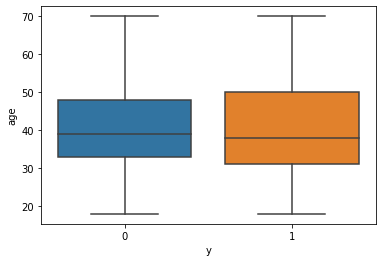

In [70]:

sns.boxplot(x=df['y'],y=df['age'])

<AxesSubplot:xlabel='y', ylabel='day'>

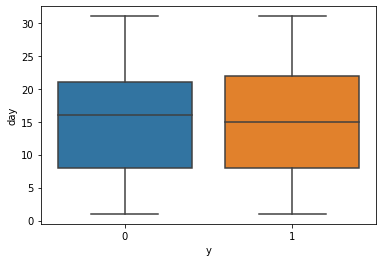

In [71]:

sns.boxplot(x=df['y'],y=df['day'])

<AxesSubplot:xlabel='y', ylabel='dur'>

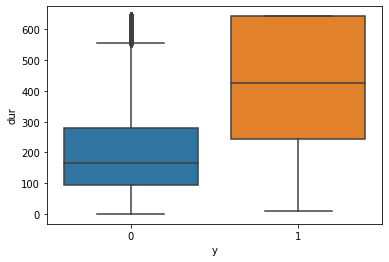

In [72]:

sns.boxplot(x=df['y'],y=df['dur'])

<AxesSubplot:xlabel='y', ylabel='num_calls'>

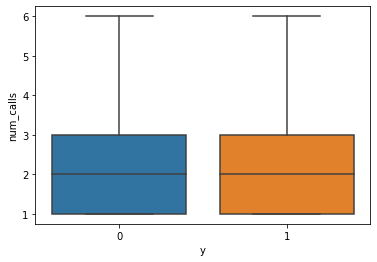

In [73]:

sns.boxplot(x=df['y'],y=df['num_calls'])

# Splitting the Data

In [75]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = df['y'].values

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [76]:
df.isna().sum()

age                     0
job                     0
education_qual          0
call_type               0
day                     0
mon                     0
dur                     0
num_calls               0
y                       0
marital_divorced        0
marital_married         0
marital_single          0
prev_outcome_failure    0
prev_outcome_other      0
prev_outcome_success    0
prev_outcome_unknown    0
dtype: int64

In [77]:

# Splitting the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [78]:
df['y'].value_counts().sum()

45205

# Balancing the data

Smoteenn

In [79]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_train, y_train = smt.fit_resample(X_train, y_train) 

In [80]:
print(X_train.shape,y_train.shape)

(53392, 15) (53392,)


SCaling

In [81]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [83]:
from sklearn.metrics import roc_auc_score
Y_pred = log_reg.predict_proba(X_test)[:, 1]
log_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (log_auroc * 100.0))

AUROC score: 88.89%


# KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8432695498285588

In [85]:
 for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K value  : " , i, " train score : ", knn.score(X_train, y_train) , " Cross-Val score : ", np.mean(cross_val_score(knn, X_train,y_train, cv=10, scoring = "roc_auc")))

K value  :  1  train score :  1.0  Cross-Val score :  0.953360814809078
K value  :  2  train score :  0.9823194486065329  Cross-Val score :  0.9707459924973694
K value  :  3  train score :  0.9762885825591849  Cross-Val score :  0.9769846508324722
K value  :  4  train score :  0.9719433623014684  Cross-Val score :  0.9803784795256641
K value  :  5  train score :  0.9685720707222055  Cross-Val score :  0.9824982882558262
K value  :  6  train score :  0.9659874138447707  Cross-Val score :  0.9839268343669175
K value  :  7  train score :  0.963702427329937  Cross-Val score :  0.9847970110310484
K value  :  8  train score :  0.9624850164818699  Cross-Val score :  0.9854646084962724
K value  :  9  train score :  0.9614923584057536  Cross-Val score :  0.9861118798246864
K value  :  10  train score :  0.9600314653880732  Cross-Val score :  0.9866928973468412
K value  :  20  train score :  0.9507978723404256  Cross-Val score :  0.9878225780450339
K value  :  50  train score :  0.94083383278393

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
from sklearn.metrics import roc_auc_score
Y_pred = log_reg.predict_proba(X_test)[:, 1]
knn_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (knn_auroc * 100.0))

AUROC score: 88.89%


# Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
from sklearn.metrics import roc_auc_score
Y_pred = dt.predict(X_test)
Y_pred
acc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (acc * 100.0))

AUROC score: 79.79%


In [90]:
from sklearn.model_selection import cross_val_score
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    print("Depth  : " , depth, " train score : ", dt.score(X_train, y_train) , " Cross-Val score : ", np.mean(cross_val_score(dt, X_train,y_train, cv=10, scoring = "roc_auc")))

Depth  :  1  train score :  0.7852861851962841  Cross-Val score :  0.7789085214569447
Depth  :  2  train score :  0.8012436320047948  Cross-Val score :  0.8653841161933784
Depth  :  3  train score :  0.864080761162721  Cross-Val score :  0.9291487616227243
Depth  :  4  train score :  0.9017455798621516  Cross-Val score :  0.9550423199914141
Depth  :  5  train score :  0.9132079712316452  Cross-Val score :  0.9671785746769711
Depth  :  6  train score :  0.9215050943961642  Cross-Val score :  0.9743770120798502
Depth  :  7  train score :  0.9274610428528619  Cross-Val score :  0.9792330424673006
Depth  :  8  train score :  0.9335855558885227  Cross-Val score :  0.9810199961445754
Depth  :  9  train score :  0.9471643691938867  Cross-Val score :  0.9804829850339793
Depth  :  10  train score :  0.9576715612825891  Cross-Val score :  0.9783776986166354
Depth  :  20  train score :  0.9991946359005094  Cross-Val score :  0.9575974110866408


In [100]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [101]:
from sklearn.metrics import roc_auc_score
Y_pred = model_dt.predict(X_test)
Y_pred
dt_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (dt_auroc * 100.0))

AUROC score: 82.06%


# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, random_state=2)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
Y_pred = model_rfc.predict(X_test)
Y_pred
rfc_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (rfc_auroc * 100.0))

AUROC score: 83.89%


# XGBoost Classifier

In [95]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.5,0.75,1]:
  model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,y_train)
  model.score(X_test, y_test)
  print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  50  Train score :  0.9397100689241834  Cross-Val score :  0.9343920539482978
Learning rate :  50  Train score :  0.9532701528318849  Cross-Val score :  0.947596405644845
Learning rate :  50  Train score :  0.9620167815403057  Cross-Val score :  0.9548823686630709
Learning rate :  50  Train score :  0.9667740485465988  Cross-Val score :  0.9594337196503995
Learning rate :  50  Train score :  0.9707446808510638  Cross-Val score :  0.9616625698958903
Learning rate :  50  Train score :  0.972224303266407  Cross-Val score :  0.9627114273949097
Learning rate :  50  Train score :  0.9826191189691339  Cross-Val score :  0.9679555991422035
Learning rate :  50  Train score :  0.9952240035960443  Cross-Val score :  0.9718513791175527
Learning rate :  50  Train score :  0.9984829187893317  Cross-Val score :  0.9722071527934155
Learning rate :  50  Train score :  0.9996254120467486  Cross-Val score :  0.9717202017799906


In [96]:
import xgboost as xgb
classifier = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.3, n_estimators=100, verbosity = 0)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
from sklearn.metrics import roc_auc_score
Y_pred = classifier.predict_proba(X_test)[:, 1]
XGB_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (XGB_auroc * 100.0))

AUROC score: 91.73%


In [98]:
pd.DataFrame({"Model":["Logistic Regression", "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "XGBoost Classifier"], "AUROC":[log_auroc, knn_auroc,dt_auroc,rfc_auroc,XGB_auroc]})

,Model,AUROC
0,Logistic Regression,0.888907
1,KNN Classifier,0.888907
2,Decision Tree Classifier,0.821305
3,Random Forest Classifier,0.838881
4,XGBoost Classifier,0.917292


Out of all Classification models the XGBoost Classifier got the most AUROC Value. So We can use XGBoost Classifier as Machine Learning Model

# Feature Importance

In [119]:
# Get feature importance scores
importances = classifier.feature_importances_
feature_names = df.columns

In [137]:
for columns, importance in enumerate(importances):
    feature_name = feature_names[columns]
    print("{}: {}".format(feature_name, importance))

age: 0.01013440266251564
job: 0.009702510200440884
education_qual: 0.005983014591038227
call_type: 0.04673467203974724
day: 0.0104913879185915
mon: 0.03988489881157875
dur: 0.06861148774623871
num_calls: 0.016266044229269028
y: 0.05659418925642967
marital_divorced: 0.027353351935744286
marital_married: 0.05748559907078743
marital_single: 0.19513708353042603
prev_outcome_failure: 0.1686568409204483
prev_outcome_other: 0.03164040669798851
prev_outcome_success: 0.255324125289917


Text(0.5, 0, 'Xgboost Feature Importance')

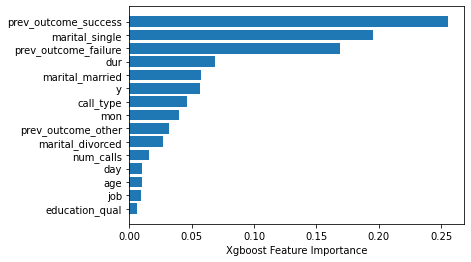

In [138]:
sorted_idx = classifier.feature_importances_.argsort()
pt.barh(feature_names[sorted_idx], classifier.feature_importances_[sorted_idx])
pt.xlabel("Xgboost Feature Importance")

# Saving the trained model

In [128]:

import pickle

In [129]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [130]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In this project we have analysed the given dataset and used various machine learning models for prediction.

The problem statement given is Supervised Learning and of type Binary classification.

We have Evaluated our models with AUROC_Score XGBOOST Classifier was found to give highest score of 0.91.

The top 3 important feautures found from LogReg model are

    1)Student

    2)Retired persons

    3)Marital status

Category Call_type is also holding a higher importance in feauture selection, but we omiited that with an assumption that a Customer is not going to care about the means of calling.

The importance of Students and Retired person could be easily understood in the job vs target graphs.

The number of Divorcees as well as Singles getting an insurance is high from the marital status vs target graph.